### Background Information

In the highly competitive airline industry, customer satisfaction is a pivotal factor that influences brand loyalty, reputation, and operational success. British Airways, a flag carrier airline of the United Kingdom, is renowned for its extensive network and premium services. However, with the advent of digital platforms, customer feedback has become more public and influential, making it imperative for airlines to monitor and analyze customer sentiments. Airlinequality.com, a leading review and rating website, hosts a wealth of unstructured feedback from passengers worldwide, offering valuable insights into their experiences. Analyzing these reviews can uncover patterns and trends in customer satisfaction, service quality, and overall passenger experience.

### Objectives of the Sentiment Analysis Project

The primary objectives of this sentiment analysis project include:

1. **To Quantify Sentiment**: Categorize the sentiments of the reviews into positive, negative, and neutral categories to quantify the overall customer sentiment towards British Airways.
2. **To Identify Key Themes**: Analyze the text to identify common themes and topics within the reviews, such as cabin service, in-flight entertainment, seat comfort, and baggage handling.
3. **To Highlight Areas for Improvement**: Pinpoint specific aspects of the service that are consistently associated with negative sentiments, providing actionable insights for service enhancement.

### Importance of the Project from a Business or Research Perspective

From a **business perspective**, this project is crucial for several reasons:

- **Enhancing Customer Experience**: By identifying areas with negative sentiments, British Airways can target improvements, thereby enhancing customer satisfaction and loyalty.
- **Strategic Decision Making**: Insights from the analysis can inform strategic decisions regarding service offerings, marketing strategies, and customer service policies.
- **Reputation Management**: Understanding public perception and addressing concerns proactively can significantly improve the airline's reputation and brand image.

From a **research perspective**, the project offers valuable contributions:

- **Advancing Sentiment Analysis Techniques**: Applying sentiment analysis to a specific industry sector enriches the methodology by tackling domain-specific challenges, such as industry jargon and context interpretation.

This sentiment analysis project, by leveraging unstructured data from airlinequality.com, not only aims to enhance British Airways' understanding of its customer feedback but also contributes to the broader domain of customer experience research in the airline industry.

# Part 1

---

## Web scraping

I utilized *BeautifulSoup*, a Python package, to gather data from the web. Once I had the data saved as a local .csv file, I began the analysis.

To scrape data from *Skytrax*, I visited [https://www.airlinequality.com]. This website contains abundant data, but for this project, I focused solely on reviews pertaining to British Airways and the airline itself.

By navigating to [https://www.airlinequality.com/airline-reviews/british-airways], I accessed the desired data. Using Python alongside BeautifulSoup, I extracted all the review links and subsequently collected the text data from each individual review link.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | That was supposed to be my ...
1,✅ Trip Verified | Have no fear when your BA f...
2,Not Verified | We have flown BA five times fr...
3,✅ Trip Verified | London Heathrow to Istanbul...
4,"Not Verified | Jan 30th, I booked a last-minut..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Data/BA_reviews.csv"
df.to_csv(file_path)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/BA_reviews.csv")


# Part 2

---

## Data Cleaning

I used *Pandas* to clean my DataFrame containing reviews data. First, I identified and removed any missing values. Then, I eliminated specific prefixes from the "reviews" column. Finally, I saved the cleaned DataFrame back to the original CSV file.





In [ ]:
# Identify missing values
df.isnull()

# Remove rows with missing values
df.dropna()

,Unnamed: 0,reviews,sentiment
0,0,That was supposed to be my flight but it was...,negative
1,1,Have no fear when your BA flight is operated...,neutral
2,2,We have flown BA five times from western USA...,negative
3,3,London Heathrow to Istanbul at the start of ...,negative
4,4,"Jan 30th, I booked a last-minute, transatlant...",negative
...,...,...,...
3749,3749,YYZ to LHR - July 2012 - I flew overnight in p...,neutral
3750,3750,LHR to HAM. Purser addresses all club passenge...,negative
3751,3751,My son who had worked for British Airways urge...,negative
3752,3752,London City-New York JFK via Shannon on A318 b...,positive


In [ ]:
# Identify duplicate rows
df.duplicated()

# Remove duplicate rows
df.drop_duplicates()

,Unnamed: 0,reviews,sentiment
0,0,That was supposed to be my flight but it was...,negative
1,1,Have no fear when your BA flight is operated...,neutral
2,2,We have flown BA five times from western USA...,negative
3,3,London Heathrow to Istanbul at the start of ...,negative
4,4,"Jan 30th, I booked a last-minute, transatlant...",negative
...,...,...,...
3749,3749,YYZ to LHR - July 2012 - I flew overnight in p...,neutral
3750,3750,LHR to HAM. Purser addresses all club passenge...,negative
3751,3751,My son who had worked for British Airways urge...,negative
3752,3752,London City-New York JFK via Shannon on A318 b...,positive


In [ ]:
# Remove the "✅ Trip Verified | " prefix from the "reviews" column
df['reviews'] = df['reviews'].str.replace(r'^✅ Trip Verified \|', '', regex=True)
df['reviews'] = df['reviews'].str.replace(r'^Not Verified |', '', regex=True)
df['reviews'] = df['reviews'].str.replace(r'|', '', regex=True)
# Save the cleaned DataFrame back to the existing CSV file, overwriting it
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data/BA_reviews.csv", index=False)

In [ ]:
df.head()

,Unnamed: 0,reviews,sentiment
0,0,That was supposed to be my flight but it was...,negative
1,1,Have no fear when your BA flight is operated...,neutral
2,2,We have flown BA five times from western USA...,negative
3,3,London Heathrow to Istanbul at the start of ...,negative
4,4,"Jan 30th, I booked a last-minute, transatlant...",negative


In [ ]:
# Dropping column 'Unnamed: 0'
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df.to_csv(file_path, index=False)

In [ ]:
df.head(30)

,reviews,sentiment
0,That was supposed to be my flight but it was...,negative
1,Have no fear when your BA flight is operated...,neutral
2,We have flown BA five times from western USA...,negative
3,London Heathrow to Istanbul at the start of ...,negative
4,"Jan 30th, I booked a last-minute, transatlant...",negative
5,I am a British Airways Gold Guest List member...,neutral
6,Another case of reviewing British Airways fl...,neutral
7,"On the memorable day of January 9th, my famil...",positive
8,I did not actually get to fly with BA as they...,negative
9,We had possibly the worse check-in experience...,neutral


# Part 3


---

# Exploratory Data Analysis

First, I conducted sentiment analysis, generated a *WordCloud*, and performed topic modeling on a set of reviews.

Second, I used *TextBlob*- *NaiveBayesClassifier* to train the classifier with a manually curated dataset of words tagged with sentiments (negative, positive, or neutral) reflecting flight experiences, then used these associations to categorize new texts into sentiments, with results visualized in a histogram showing sentiment frequencies.

*Word Cloud*

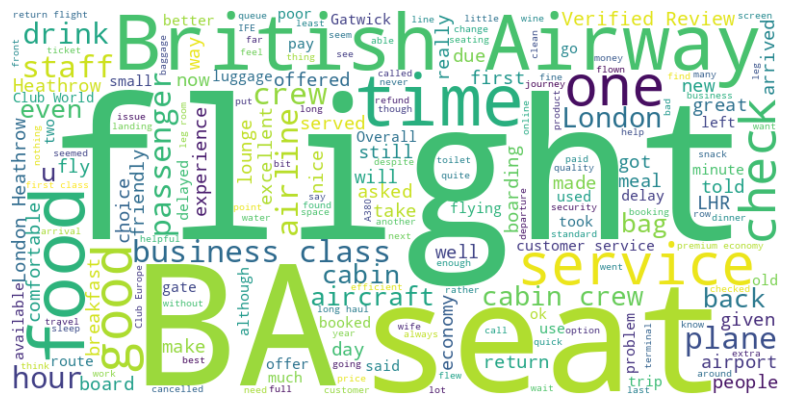

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single text
combined_reviews = " ".join(df['reviews'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The word cloud generated represents a visual summary of the most frequently occurring words in customer reviews of British Airways from the website airlinequality.com. In a word cloud, the size of each word is proportional to its frequency or importance in the source text. Here are some insights we can glean from this word cloud:

1. **Service Quality**: The words "service," "good," "excellent," "staff," and "crew" are prominently displayed, suggesting that these are common topics in the reviews. The varying sizes of these words indicate differing frequencies, with "service" being one of the most frequently mentioned.

2. **Flight Aspects**: "Flight," "cabin," "seat," "food," "drink," "meal," and "breakfast" are notable, indicating that these are key areas of focus in the reviews. This suggests that passengers often comment on their in-flight experience, including seating comfort, food and beverage quality.

3. **Airports**: "Heathrow," "Gatwick," and "London" are quite large, which means that many reviews mention these airports. This implies that British Airways flights to and from London, particularly through Heathrow and Gatwick airports, are commonly reviewed.

4. **Class of Service**: There are references to different classes such as "economy," "business class," and "first class." This suggests that reviews cover experiences across different service levels.

5. **Overall Experience**: Words like "back," "choice," "booked," "return," and "trip" suggest that reviewers are discussing their overall experience and decisions related to their flights.

6. **Time-Related Aspects**: Words such as "hour," "minute," "delay," and "time" indicate that timing and punctuality might be points of interest or concern among reviewers.

7. **Customer Sentiment**: The presence of both positive terms like "excellent," "great," "good," and "comfortable," as well as more negative ones like "poor" and "small," indicates a mix of sentiments in the reviews.

8. **Comparative Words**: The use of comparative words such as "better," "even," "still," "much," and "least" suggests that reviewers are comparing aspects of British Airways with their expectations or with other airlines.

9. **Problems & Solutions**: The word "issue" and phrases like "asked for" suggest that some reviews are likely discussing problems encountered and how the airline staff may have addressed them.

It's important to note that a word cloud does not provide context or sentiment analysis beyond the frequency of words. Therefore, while we can identify what topics are being discussed, we cannot infer the overall sentiment or the specifics of the reviews without additional qualitative analysis.

*Sentiment Analysis*

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
# Define lists of words for each sentiment
negative_words = [
    "delayed", "cancelled", "overbooked", "cramped", "uncomfortable", "rude", "lost luggage", "long layovers", "noisy",
    "turbulence", "poor service", "nasty food", "expensive", "hidden fees", "narrow seats", "limited legroom", "bad entertainment",
    "lack of cleanliness", "unfriendly staff", "mismanagement", "inefficient", "disorganized", "unhelpful", "late", "crowded",
    "dirty", "screaming children", "faulty", "broken", "stale", "unpleasant", "unreliable", "worst", "dissatisfying", "unacceptable",
    "disastrous", "hectic", "stressful", "tiring", "exhausting", "annoying", "aggravating", "frustrating", "disappointing", "upsetting"
]

positive_words = [
    "on-time", "comfortable", "friendly staff", "tasty food", "affordable", "spacious", "ample legroom", "entertaining",
    "clean", "efficient", "well-organized", "helpful", "convenient", "smooth", "peaceful", "quiet", "relaxing", "enjoyable",
    "satisfying", "excellent service", "good value", "prompt", "secure", "safe", "luxurious", "premier", "top-notch", "first-class",
    "superior", "outstanding", "remarkable", "fantastic", "amazing", "delightful", "pleasant", "comforting", "welcoming", "refreshing",
    "inviting", "accommodating", "generous", "courteous", "attentive", "professional", "polite", "warm", "friendly", "gracious"
]

# Function to classify sentiment based on the presence of negative or positive words
def classify_review(text):
    # Tokenize the text into words
    words = text.lower().split()
    # Check for negative words
    if any(negative_word in words for negative_word in negative_words):
        return 'negative'
    # Check for positive words if no negative word is found
    elif any(positive_word in words for positive_word in positive_words):
        return 'positive'
    # Default to neutral
    else:
        return 'neutral'

# Example test data to classify
test_data = [
    "The flight was delayed and the staff was rude.",
    "I enjoyed the spacious seating and friendly service.",
    "The meal was average, but the flight arrived on time.",
]

# Classify the sentiment of the test data
for text in test_data:
    sentiment = classify_review(text)
    print(f"Sentiment of '{text}': {sentiment}")


Sentiment of 'The flight was delayed and the staff was rude.': negative
Sentiment of 'I enjoyed the spacious seating and friendly service.': positive
Sentiment of 'The meal was average, but the flight arrived on time.': neutral


In [ ]:
df['sentiment'] = df['reviews'].apply(classify_review)

# Save the changes to a new CSV file
new_file_path = "/content/drive/MyDrive/Colab Notebooks/Data/BA_reviews_modified.csv"
df.to_csv(new_file_path, index=False)
new_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/BA_reviews_modified.csv")

# Display the updated DataFrame as a confirmation
print(new_df)

                                                reviews sentiment
0       That was supposed to be my flight but it was...  negative
1       Have no fear when your BA flight is operated...   neutral
2       We have flown BA five times from western USA...  negative
3       London Heathrow to Istanbul at the start of ...  negative
4      Jan 30th, I booked a last-minute, transatlant...  negative
...                                                 ...       ...
3749  YYZ to LHR - July 2012 - I flew overnight in p...   neutral
3750  LHR to HAM. Purser addresses all club passenge...  negative
3751  My son who had worked for British Airways urge...  negative
3752  London City-New York JFK via Shannon on A318 b...  positive
3753  SIN-LHR BA12 B747-436 First Class. Old aircraf...  negative

[3754 rows x 2 columns]


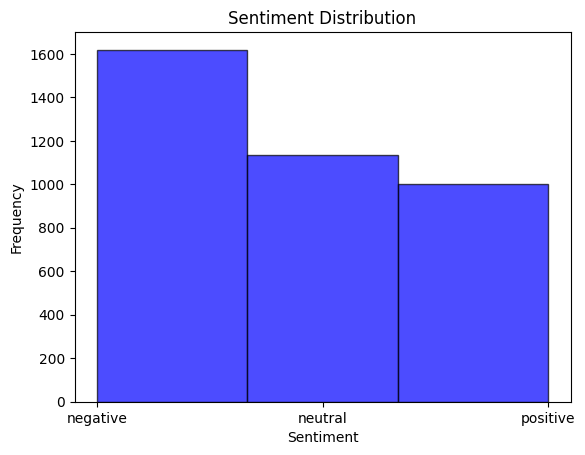

In [ ]:
# Plot the histogram of the sentiment distribution
plt.hist(new_df['sentiment'], bins=3, alpha=0.7, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Method Used for Sentiment Analysis:

1. **Training Data**: The classifier is trained on a dataset where each entry consists of a list of words associated with a particular sentiment (negative, positive, or neutral). This list is manually crafted to contain words that are commonly associated with each sentiment in the context of flight experiences.

2. **Classification**: Once trained, the classifier examines the words in a new piece of text (such as a customer review). Based on the presence of words that it learned during training, it assigns a sentiment to the text. If the text contains any words from the negative list, it's classified as negative. If it contains no negative words but has positive words, it's classified as positive. If it contains neither, it is classified as neutral.

3. **Results Presentation**: The results of the classification are then tabulated and can be visualized using a histogram to show the frequency of each sentiment category within the dataset.

### Analysis of the Data:

The histogram shows the distribution of sentiment across three categories: negative, neutral, and positive.

- **Negative Sentiment**: The histogram shows that the negative sentiment category has the highest frequency, suggesting that there are more reviews with negative sentiments than positive or neutral. This could indicate customer dissatisfaction or that negative experiences are more frequently shared.

- **Neutral Sentiment**: The neutral category has a lower frequency than the negative but higher than the positive, which might imply that customers often have experiences that are neither particularly bad nor good, or they tend to use less emotionally charged language when describing average experiences.

- **Positive Sentiment**: The positive sentiment has the lowest frequency, which could suggest that customers are less likely to leave positive feedback, or that truly positive experiences are less common.

### Limitations of the Method:

1. **Context Ignorance**: Naive Bayes classifiers and similar methods often ignore the context in which words are used. This can lead to misclassification if words have different meanings in different contexts.

2. **Sarcasm and Irony**: These classifiers are not good at detecting sarcasm, irony, or subtler forms of sentiment.

3. **Neutral Sentiments**: The method may not be as effective at identifying neutral sentiments, which can be more nuanced and less about the presence or absence of certain keywords.

4. **Sentiment Intensity**: The method does not account for the intensity of sentiment. All negative or positive words are treated equally, whether they indicate mild dissatisfaction or extreme frustration.

5. **Unseen Words**: If the classifier encounters words that were not present in the training data, it may not classify the sentiment correctly.

In summary, while this method provides a quick and automated way to gauge sentiment, it does have several limitations, especially regarding understanding the nuances of language.

# Part 4


---

# Enhancing Sentiment Analysis

In this stage, I utilized *Counter* from *collections* and several *NLTK* modules including *punkt*, *stopwords*, *averaged_perceptron_tagger*, and *word_tokenize*, along with *re* for regular expressions, to preprocess the customer reviews. This involved concatenating, cleaning, tokenizing, and removing stopwords, verbs, pronouns, irrelevant words, and location names.

Then I plotted a stacked bar chart representing the sentiment distribution for specific words of interest within a set of customer reviews.

*Text Processing*

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


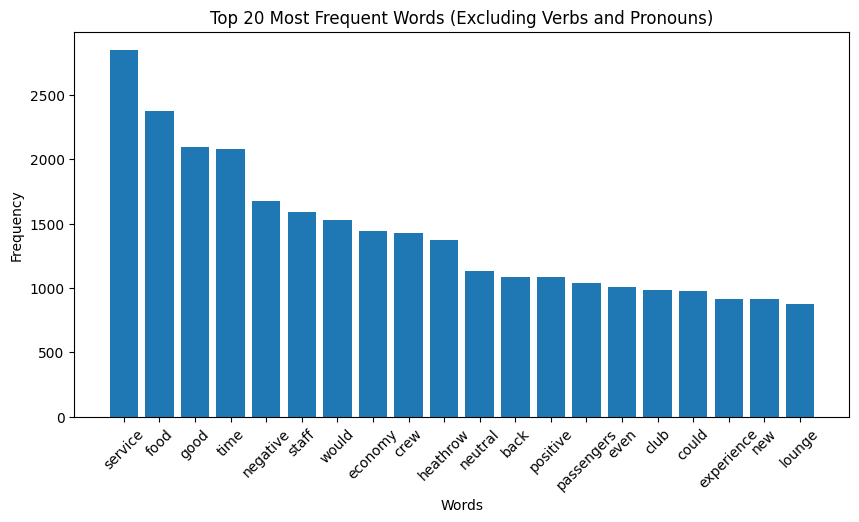

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  # Download the POS tagger data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Assuming new_df is your DataFrame containing the reviews data
all_text = ""

# Concatenate text from all columns
for column in new_df.columns:
    all_text += " ".join(new_df[column]) + " "

# Remove symbols and convert to lowercase
all_text = re.sub(r'[^\w\s]', '', all_text)
all_text = all_text.lower()

# Tokenize the text (split the text into words)
words = word_tokenize(all_text)

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Remove stopwords from the list of words
filtered_words = [word for word in words if word not in stop_words]

# Tag parts of speech (POS)
tagged_words = nltk.pos_tag(filtered_words)

# Remove verbs and pronouns from the list of words
filtered_words = [word for word, pos in tagged_words if pos not in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'PRP', 'PRP$', 'WP', 'WP$']]

# Remove specific words like "british", "airways", "ba"
filtered_words = [word for word in filtered_words if word not in ["british", "airways", "ba", "flight", "flights", "seat", "seats", "plane", "airline", "class", "one", "first", "business", "hours", "cabin"]]

# Remove location names (replace with actual location names)
location_names = ["london", "new york", "paris"]  # Example location names, replace with actual names
filtered_words = [word for word in filtered_words if word.lower() not in location_names]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Convert the word frequency dictionary to a DataFrame for easier manipulation
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top N most frequent words
top_n = 20  # Change this value to display more or fewer top words
plt.figure(figsize=(10, 5))
plt.bar(word_freq_df['Word'][:top_n], word_freq_df['Frequency'][:top_n])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words (Excluding Verbs and Pronouns)')
plt.xticks(rotation=45)
plt.show()



Method Used:
The method applied here is a text preprocessing and frequency analysis of words within a dataset.

- Concatenating text from all columns of the DataFrame.
- Cleaning the text by removing punctuation and converting to lowercase.
- Tokenization of the text to split it into words.
- Removal of English stopwords.
- Part-of-speech tagging to identify and subsequently remove verbs and pronouns.
- Removal of irrelevant common words and specific location names.
- Counting the frequency of each remaining word.

Analysis of the Data:
The analysis aims to identify the most frequent significant words used in the reviews by removing common English words, verbs, pronouns, and other irrelevant words (like specific brand or location names). By plotting the frequency of the remaining words, you can infer the most prominent topics or features mentioned in the reviews.

Based on the histogram we can infer the following:

1. **Service**: This is the most frequently mentioned term, suggesting that 'service' is a significant aspect of the customer experience. It is mentioned far more often than any other term in the dataset, which indicates it is a primary concern or point of interest for customers.

2. **Food and Time**: Both 'food' and 'time' are also mentioned frequently, which might imply that the quality of food and the timing aspects of the service (like punctuality) are important to customers.

3. **Adjectives**: The presence of 'good', 'negative', 'neutral', 'positive', and 'new' suggests that customers are expressing opinions about their experiences. The words 'negative' and 'neutral' appear almost as frequently as 'good' and 'positive', indicating a mix of sentiments in the reviews.

4. **Staff-Related Terms**: Words like 'staff', 'crew', and 'passengers' indicate that interactions with airline personnel and other passengers are common topics of discussion in the reviews.

5. **Economy**: The term 'economy' might refer to the economy class of the airline, suggesting that many reviews pertain to experiences in this travel class.

6. **Specific Terms**: 'Heathrow', 'club', and 'lounge' may refer to specific services or locations (like Heathrow Airport, airline clubs, or lounges) that are notable in the customer experience.

7. **Experience**: The word 'experience' is also one of the more frequent terms, underscoring that reviews are focused on the overall experience of the service.


Limitations of the Method is that it does not differentiate between positive and negative sentiments associated with the words, this is why we will further analyze the data to do so.

*Sentiment Distribution*

In [ ]:
# Words of interest, modifications are made so ensures that even if the word of interest is part of a larger word in the review text, it will still be counted
words_of_interest = ['Delay', 'Food', 'Clean', 'Service',
                     'Entertain', 'Luggage', 'Booking',
                     'Communicat', 'Safety', 'Comfort',
                     'Cabin', 'Seat', 'Amenit', 'Access',
                     'Boarding', 'Staff', 'Facilit',
                     'Pric', 'Connect', 'Legroom']

# Function to count sentiments for each word
def count_sentiments(word):
    word = word.lower()
    counts = {'positive': 0, 'negative': 0, 'neutral': 0}
    for index, row in df.iterrows():
        if word in row['reviews'].lower():  # Check if the word is present as a substring
            counts[row['sentiment']] += 1
    return counts

# Create a dictionary to store counts for each word
word_sentiment_counts = {}

# Count sentiments for each word
for word in words_of_interest:
    word_sentiment_counts[word] = count_sentiments(word)

# Create a DataFrame from the counts
sentiment_counts_df = pd.DataFrame(word_sentiment_counts).T

# Display the DataFrame
print(sentiment_counts_df)

            positive  negative  neutral
Delay             60       528       89
Food             541       715      455
Clean            172       153       35
Service          498       822      543
Entertain        184       241      136
Luggage           72       190      126
Booking           43       137       75
Communicat         8        40       17
Safety            14        32       12
Comfort          401       423      102
Cabin            459       579      323
Seat             632       967      595
Amenit            28        31       16
Access            39        61       29
Boarding         231       359      172
Staff            327       528      287
Facilit           13        34       15
Pric              93       191      105
Connect           52       195       72
Legroom           73        89       52


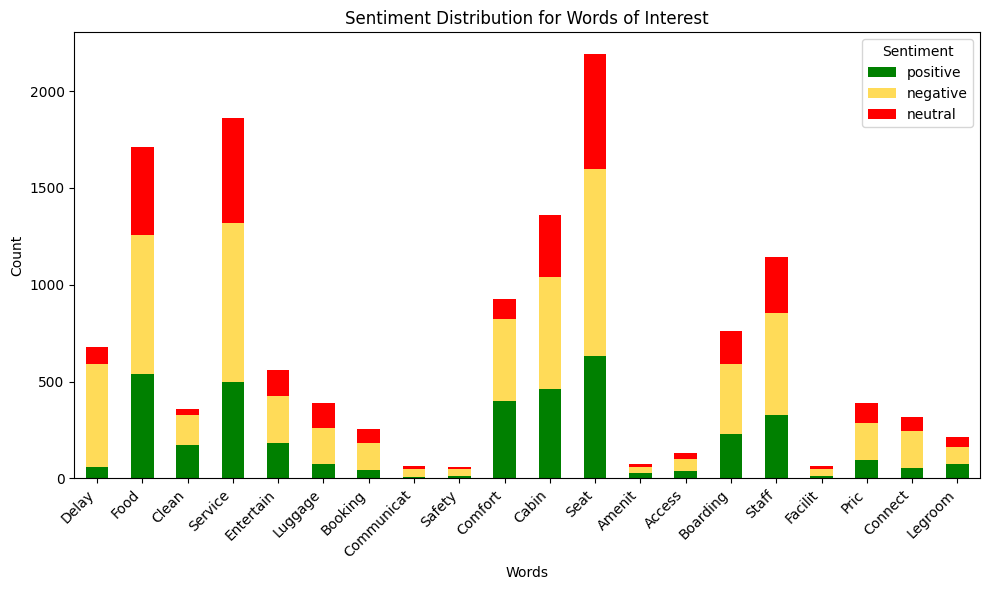

In [ ]:
colors = ['green', '#FFDB58', 'red']  # Specify colors for positive, neutral, negative

# Plot stacked bar chart with custom colors
sentiment_counts_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Sentiment Distribution for Words of Interest')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


The chart represents the sentiment distribution for specific words of interest within a set of customer reviews.

### Method Used:
1. **Identified Words of Interest**: A list comprising of the words that are significant for the analysis is generated. These words are related to various aspects of a service, possibly an airline, given the context of words like 'Seat', 'Cabin', and 'Legroom'.

2. **Sentiment Count Function**: With the use of function `count_sentiments` that iterates through each review in the dataset and the counts of how many times each word of interest is mentioned in association with each type of sentiment (positive, negative, or neutral).

3. **Data Aggregation**: Then looped through each word of interest and applied the `count_sentiments` function to compile the sentiment counts into a dictionary `word_sentiment_counts`.

4. **Visualization**: Finally, a bar graph from the DataFrame that visualizes the count of each sentiment (positive, negative, neutral) for each word of interest.

### Analysis of the Data:
- **Service**: The word 'Service' has a significant number of positive mentions, but also a substantial number of negative mentions, indicating that while many customers are satisfied with the service, there is a notable proportion that is not.

- **Safety, Comfort, and Cabin**: These three aspects have a higher positive sentiment overall, suggesting customers are generally pleased with these aspects of the service.

- **Delay**: The sentiment associated with 'Delay' is overwhelmingly negative, which is expected as delays are typically a source of frustration for customers.

- **Staff**: The 'Staff' appears to be well-perceived with a majority of the sentiments being positive.

- **Entertain and Amenit (Amenities)**: These aspects show a balanced sentiment distribution with a slight lean towards the positive, indicating that while there are some criticisms, overall, the entertainment and amenities provided are well received.

- **Food and Clean**: Both show a relatively balanced sentiment distribution but with a higher count of positive mentions, suggesting that while there are some complaints, overall, the food quality and cleanliness are appreciated by customers.

- **Pric (Price)**: Price has a noticeable negative sentiment associated with it, suggesting that customers may feel the service is overpriced or not a good value for money.

- **Legroom**: Legroom, often a point of contention in travel, shows a majority of negative sentiment, which indicates discomfort or dissatisfaction with the space provided.

This sentiment analysis is helpful for businesses to understand the strengths and weaknesses of their service as perceived by customers. It can guide improvements and highlight areas that are already doing well.